# **Step 1** 

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [2]:
#loading dataset
data_train=pd.read_csv('train.csv')
data_test=pd.read_csv('test.csv')

In [3]:
data_train.head(5)

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [4]:
print(data_train.shape)
print(data_test.shape)

(14999, 9)
(8764, 8)


In [5]:
data_train.dtypes

vidid        object
adview        int64
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category     object
dtype: object

# **Step 2,3,4**

In [6]:
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)
data_test["category"]=data_test["category"].map(category)
print(data_train.head())
print(data_test.head())


       vidid  adview    views likes  ... comment   published duration category
0  VID_18655      40  1031602  8523  ...    1095  2016-09-14  PT7M37S        6
1  VID_14135       2     1707    56  ...       6  2016-10-01  PT9M30S        4
2   VID_2187       1     2023    25  ...       2  2016-07-02  PT2M16S        3
3  VID_23096       6   620860   777  ...     153  2016-07-27  PT4M22S        8
4  VID_10175       1      666     1  ...       0  2016-06-29    PT31S        4

[5 rows x 9 columns]
       vidid    views likes dislikes comment   published  duration  category
0   VID_1054   440238  6153      218    1377  2017-02-18   PT7M29S         2
1  VID_18629  1040132  8171      340    1047  2016-06-28   PT6M29S         6
2  VID_13967    28534    31       11       1  2014-03-10  PT37M54S         4
3  VID_19442  1316715  2284      250     274  2010-06-05   PT9M55S         7
4    VID_770  1893173  2519      225     116  2016-09-03    PT3M8S         2


In [7]:
#removing the 'F' character 
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']

data_test=data_test[data_test.views!='F']
data_test=data_test[data_test.likes!='F']
data_test=data_test[data_test.dislikes!='F']
data_test=data_test[data_test.comment!='F']

In [8]:
#converting object type to numeric type
data_train['views']=pd.to_numeric(data_train['views'])
data_train['likes']=pd.to_numeric(data_train['likes'])
data_train['dislikes']=pd.to_numeric(data_train['dislikes'])
data_train['comment']=pd.to_numeric(data_train['comment'])
data_train['adview']=pd.to_numeric(data_train['adview'])
print(data_train.dtypes)

data_test['views']=pd.to_numeric(data_test['views'])
data_test['likes']=pd.to_numeric(data_test['likes'])
data_test['dislikes']=pd.to_numeric(data_test['dislikes'])
data_test['comment']=pd.to_numeric(data_test['comment'])
print(data_test.dtypes)

vidid        object
adview        int64
views         int64
likes         int64
dislikes      int64
comment       int64
published    object
duration     object
category      int64
dtype: object
vidid        object
views         int64
likes         int64
dislikes      int64
comment       int64
published    object
duration     object
category      int64
dtype: object


In [9]:
#Encoding features like published,vidid,duration
from sklearn.preprocessing import LabelEncoder
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])
print(data_train.head(5))

data_test['vidid']=LabelEncoder().fit_transform(data_test['vidid'])
data_test['duration']=LabelEncoder().fit_transform(data_test['duration'])
data_test['published']=LabelEncoder().fit_transform(data_test['published'])
print(data_test.head(5))

   vidid  adview    views  likes  ...  comment  published  duration  category
0   5912      40  1031602   8523  ...     1095       2168      2925         6
1   2741       2     1707     56  ...        6       2185      3040         4
2   8138       1     2023     25  ...        2       2094      1863         3
3   9005       6   620860    777  ...      153       2119      2546         8
4    122       1      666      1  ...        0       2091      1963         4

[5 rows x 9 columns]
   vidid    views  likes  dislikes  comment  published  duration  category
0    231   440238   6153       218     1377       2053      2115         2
1   3444  1040132   8171       340     1047       1825      2055         6
2   1593    28534     31        11        1       1009      1506         4
3   3775  1316715   2284       250      274        116      2265         7
4   7644  1893173   2519       225      116       1892      1625         2


In [10]:
# Converting Time into Sec 
import datetime
import time

def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp

train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
tr = pd.read_csv("train.csv")["duration"]
te=pd.read_csv("test.csv")["duration"]
timetr = tr.apply(checki)
timete=te.apply(checki)

def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

time1=timetr.apply(func_sec)
time2=timete.apply(func_sec)

data_train["duration"]=time1
data_test["duration"]=time2
print(data_train.head())
print(data_test.head())

   vidid  adview    views  likes  ...  comment  published  duration  category
0   5912      40  1031602   8523  ...     1095       2168       457         6
1   2741       2     1707     56  ...        6       2185       570         4
2   8138       1     2023     25  ...        2       2094       136         3
3   9005       6   620860    777  ...      153       2119       262         8
4    122       1      666      1  ...        0       2091        31         4

[5 rows x 9 columns]
   vidid    views  likes  dislikes  comment  published  duration  category
0    231   440238   6153       218     1377       2053       449         2
1   3444  1040132   8171       340     1047       1825       389         6
2   1593    28534     31        11        1       1009      2274         4
3   3775  1316715   2284       250      274        116       595         7
4   7644  1893173   2519       225      116       1892       188         2


<function matplotlib.pyplot.show>

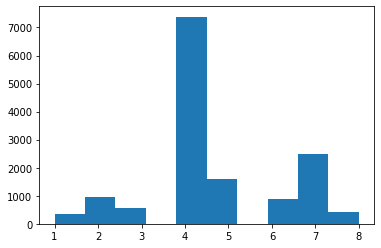

In [11]:
# Visualization
# Histogram
plt.hist(data_train['category'])
plt.show


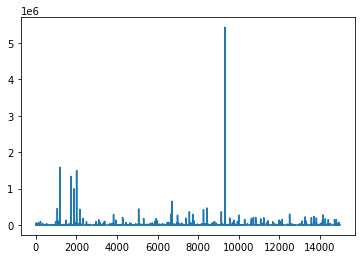

In [12]:
# Line Graph
plt.plot(data_train['adview'])
plt.show()

<function matplotlib.pyplot.show>

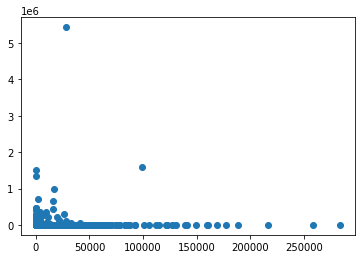

In [13]:
# Scattered Graph
plt.scatter(data_train['likes'],data_train['adview'])
plt.show

In [14]:
# Removing videos with adview greater the 20,00,000 as outliers
data_train=data_train[data_train['adview']<2000000] 

<function matplotlib.pyplot.show>

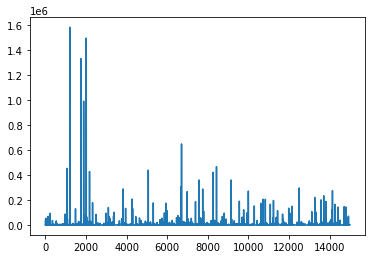

In [15]:
plt.plot(data_train['adview'])
plt.show

<function matplotlib.pyplot.show>

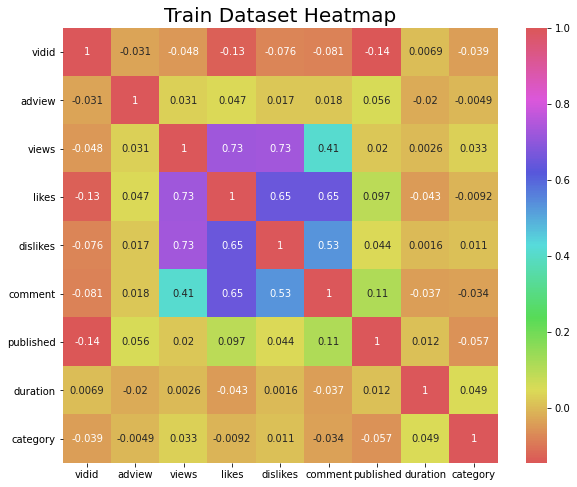

In [16]:
# heatmap
f,ax=plt.subplots(figsize=(10,8))
title="Train Dataset Heatmap"
plt.title(title,fontsize=20)

corr=data_train.corr()
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.hls_palette(220,10,as_cmap=True),square=True,ax=ax,annot=True)
plt.show

# **Step 5**

In [17]:
# Spliting data
Y_train=pd.DataFrame(data=data_train.iloc[:,1].values,columns=['target'])
Y_train


,target
0,40
1,2
2,1
3,6
4,1
...,...
14631,2
14632,1
14633,4
14634,1


In [18]:
data_train=data_train.drop(['adview'],axis=1)
data_train=data_train.drop(['vidid'],axis=1)
print(data_train.head(5))

data_test=data_test.drop(['vidid'],axis=1)
print(data_test.head(5))

     views  likes  dislikes  comment  published  duration  category
0  1031602   8523       363     1095       2168       457         6
1     1707     56         2        6       2185       570         4
2     2023     25         0        2       2094       136         3
3   620860    777       161      153       2119       262         8
4      666      1         0        0       2091        31         4
     views  likes  dislikes  comment  published  duration  category
0   440238   6153       218     1377       2053       449         2
1  1040132   8171       340     1047       1825       389         6
2    28534     31        11        1       1009      2274         4
3  1316715   2284       250      274        116       595         7
4  1893173   2519       225      116       1892       188         2


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data_train,Y_train,test_size=0.2,random_state=42)
y_train

,target
13119,39
9293,4
2937,18782
1839,2
11099,20
...,...
5191,21127
13418,1
5390,1
860,2


In [20]:
X_train.describe()

,views,likes,dislikes,comment,published,duration,category
count,1.170800e+04,11708.000000,11708.000000,11708.000000,11708.000000,11708.000000,11708.000000
mean,6.974161e+05,2771.122139,251.030577,418.178767,1551.810215,1048.108985,4.611548
std,2.582877e+06,8734.608422,965.881840,1556.703705,579.565587,2379.930309,1.579242
min,4.900000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.133975e+04,86.000000,7.000000,7.000000,1144.000000,188.000000,4.000000
50%,1.609395e+05,461.000000,39.000000,46.000000,1704.000000,327.000000,4.000000
75%,5.842132e+05,1897.000000,170.000000,232.000000,2065.000000,726.000000,6.000000
max,1.380479e+08,283824.000000,49449.000000,75045.000000,2383.000000,42317.000000,8.000000


In [21]:
# Normalising Data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

#**Step 6,7**

In [25]:
# Evaluation Metrics
from sklearn import metrics

def print_error(X_test, y_test, model_name):
  prediction = model_name.predict(X_test)
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))



# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)

Mean Absolute Error: 3707.378005824532
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


In [26]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree=DecisionTreeRegressor()
decision_tree.fit(X_train,y_train)
print_error(X_test,y_test, decision_tree)

Mean Absolute Error: 2785.7561475409834
Mean Squared Error: 904880432.3551912
Root Mean Squared Error: 30081.23056583941


In [27]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators=200
max_depth=25
min_samples_split=15
min_samples_leaf=2
random_forest=RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Mean Absolute Error: 3342.2241315917217
Mean Squared Error: 714411838.2325572
Root Mean Squared Error: 26728.483650079314


In [28]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor=SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, supportvector_regressor)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 1696.9438599505638
Mean Squared Error: 833685776.029172
Root Mean Squared Error: 28873.617300732723


In [29]:
#Chosing random forest regressor for making predictions
from sklearn.ensemble import RandomForestRegressor
n_estimators=200
max_depth=25
min_samples_split=15
min_samples_leaf=2
random_forest=RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
random_forest.fit(X_train,y_train)
forest_predictions=random_forest.predict(data_test)
forest_predictions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


array([135411.48437914, 135411.48437914, 135411.48437914, ...,
       135411.48437914, 135411.48437914, 150112.03776813])

In [30]:
#Creating Predictions_Submission.csv
new_column = pd.DataFrame({'adview': forest_predictions})
df=pd.DataFrame(data_test)
final=pd.concat([df,new_column],axis=1)
final.to_csv('Predictions_Submission.csv',index=False)

#**Step 8**

In [31]:
# Artificial Neural Networks
import keras
from keras.layers import Dense
ann=keras.models.Sequential([
                             Dense(6,activation="relu",
                             input_shape=X_train.shape[1:]),
                             Dense(6,activation="relu"),
                             Dense(1)
                             ])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=['mean_squared_error'])
history=ann.fit(X_train,y_train,epochs=100)


Epoch 1/100
366/366 [==============================] - 0s 1ms/step - loss: 767405568.0000 - mean_squared_error: 767405568.0000
Epoch 2/100
366/366 [==============================] - 0s 1ms/step - loss: 767400384.0000 - mean_squared_error: 767400384.0000
Epoch 3/100
366/366 [==============================] - 0s 1ms/step - loss: 767390336.0000 - mean_squared_error: 767390336.0000
Epoch 4/100
366/366 [==============================] - 0s 928us/step - loss: 767373312.0000 - mean_squared_error: 767373312.0000
Epoch 5/100
366/366 [==============================] - 0s 897us/step - loss: 767348800.0000 - mean_squared_error: 767348800.0000
Epoch 6/100
366/366 [==============================] - 0s 1ms/step - loss: 767318400.0000 - mean_squared_error: 767318400.0000
Epoch 7/100
366/366 [==============================] - 0s 959us/step - loss: 767279296.0000 - mean_squared_error: 767279296.0000
Epoch 8/100
366/366 [==============================] - 0s 925us/step - loss: 767236352.0000 - mean_square

In [32]:
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 48        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [33]:
print_error(X_test,y_test, ann)

Mean Absolute Error: 3169.7318887080323
Mean Squared Error: 829523531.9227574
Root Mean Squared Error: 28801.450170481996


#**Step 9,10**

In [34]:
# Saving Scikitlearn models
import joblib
joblib.dump(random_forest,"randomforest_youtubeadview.pkl")

['randomforest_youtubeadview.pkl']

In [35]:
# Saving keras ANN model
ann.save("ann_youtubeadview.h5")